<a href="https://colab.research.google.com/github/Shaiqab/python/blob/main/Python_end_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [ ]:
#read dataset
df=pd.read_csv("/content/Diwali Sales Data.csv",encoding="unicode_escape")

In [ ]:
#how dataset look
df.head(5)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [ ]:
#to check number of rows and columns
df.shape

(11251, 15)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [ ]:
#drop unrelated/blank columns
df.drop(["Status","unnamed1"],axis=1,inplace=True)

In [ ]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [ ]:
#to check the null values
df.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [ ]:
df.dropna(inplace=True)  #drop null values

In [ ]:
df.shape

(11239, 13)

In [ ]:
df.isnull().sum() #to check null values

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [ ]:
df["Amount"]=df["Amount"].astype("int")

In [ ]:
df["Amount"].dtype

dtype('int64')

In [ ]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


#Exploratory Data Analysis

Gender

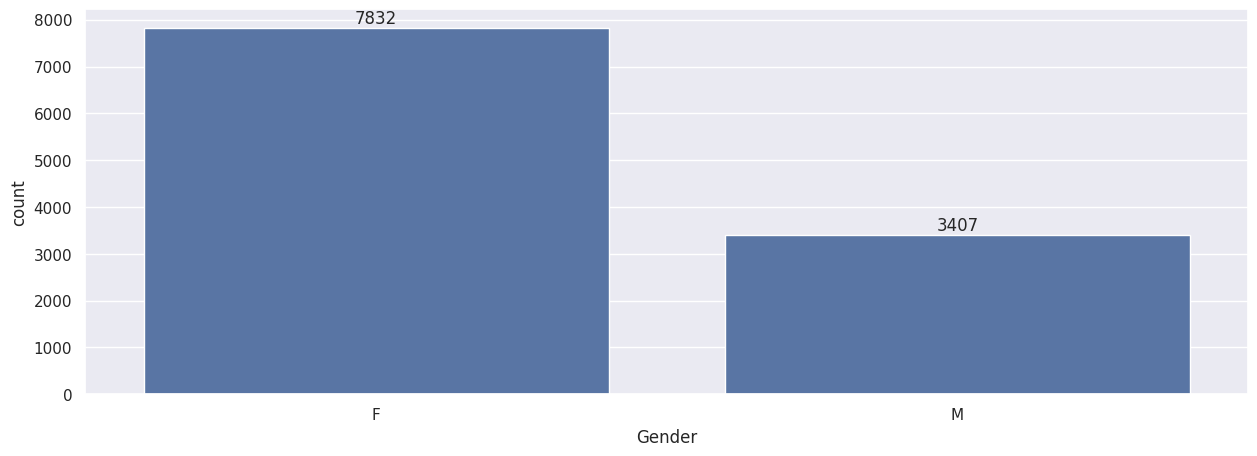

In [ ]:
ax=sns.countplot(x=df["Gender"])
for bars in ax.containers:
  ax.bar_label(bars)

In [ ]:
df["Gender"].value_counts()

F    7832
M    3407
Name: Gender, dtype: int64

In [ ]:
sales_gen=df.groupby(["Gender"],as_index=False)["Amount"].sum().sort_values(by="Amount",ascending=False)

<Axes: xlabel='Gender', ylabel='Amount'>

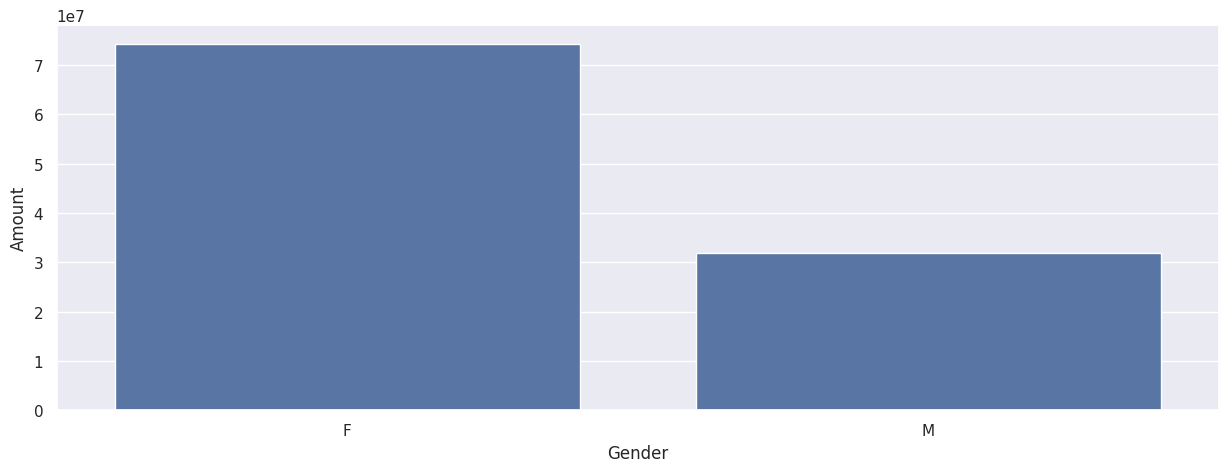

In [ ]:
sns.barplot(x="Gender",y="Amount",data=sales_gen)

from above graph we can see that most of the buyers are females and even the purchasing power of females are greater than men


AGE

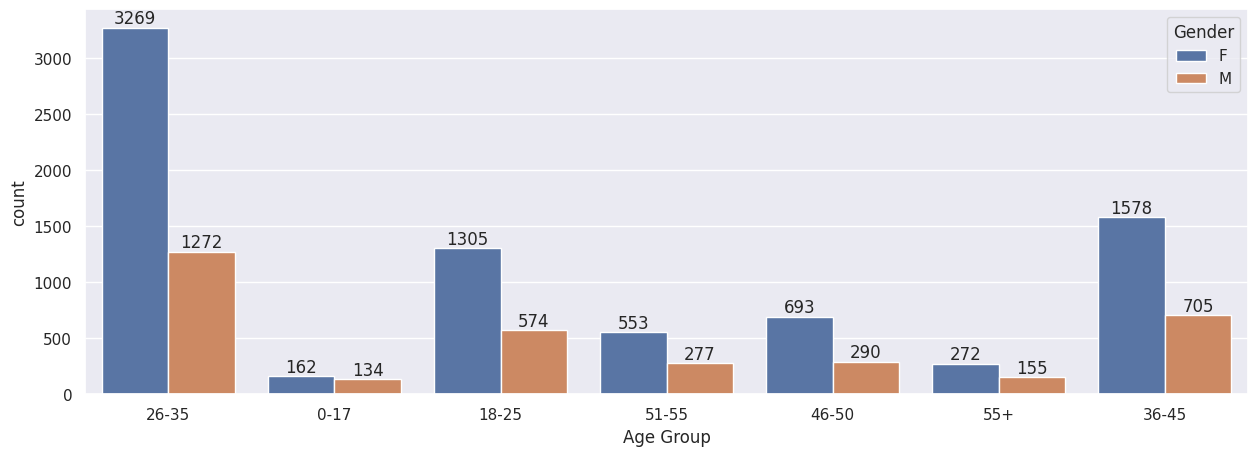

In [ ]:
ax=sns.countplot(data=df,x="Age Group",hue="Gender")
for bars in ax.containers:
  ax.bar_label(bars)

In [ ]:
#total amount vs age group
sales_age=df.groupby(["Age Group"],as_index=False)["Amount"].sum().sort_values(by="Amount",ascending=False)

<Axes: xlabel='Age Group', ylabel='Amount'>

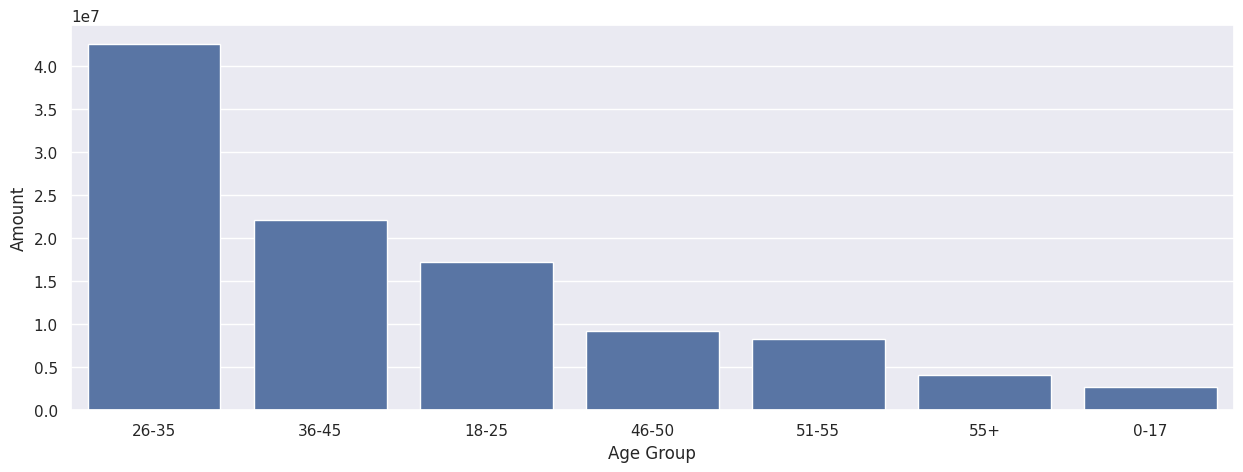

In [ ]:
sns.barplot(x="Age Group",y="Amount",data=sales_age)

from above graph we can see that most of the buyers are agr group between 26-35 years

In [ ]:
#total orders from top 10 states
df.groupby(["State"],as_index=False)["Orders"].sum().sort_values(by="Orders",ascending=False)

,State,Orders
14,Uttar Pradesh,4807
10,Maharashtra,3810
7,Karnataka,3240
2,Delhi,2740
9,Madhya Pradesh,2252
0,Andhra Pradesh,2051
5,Himachal Pradesh,1568
8,Kerala,1137
4,Haryana,1109
3,Gujarat,1066


In [ ]:
sales_sta=df.groupby(["State"],as_index=False)["Orders"].sum().sort_values(by="Orders",ascending=False).head(10)

<Axes: xlabel='State', ylabel='Orders'>

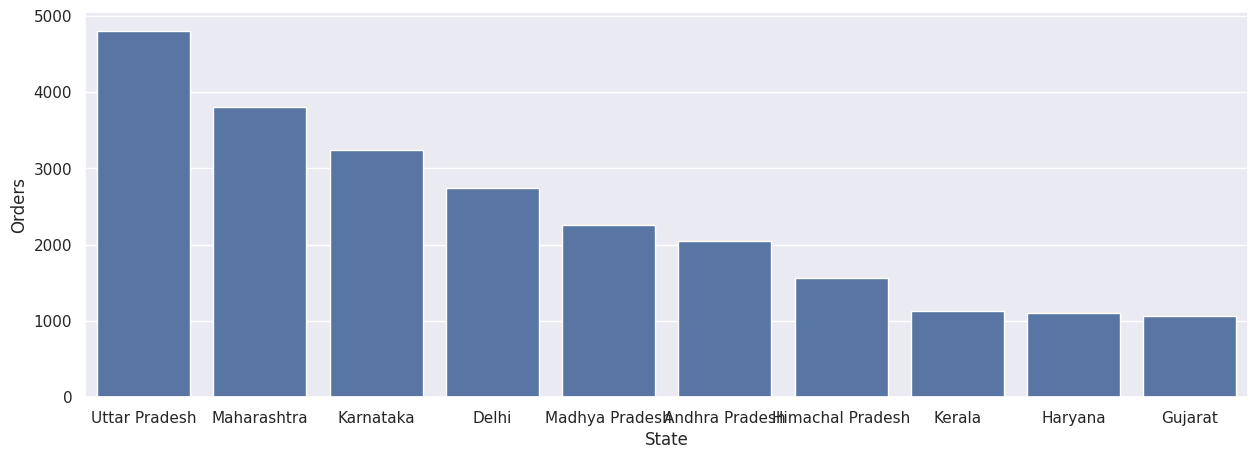

In [ ]:
sns.set(rc={"figure.figsize":(15,5)})
sns.barplot(data=sales_sta,x="State",y="Orders")

In [ ]:
#total sales/amount from top 10 state
sale_state=df.groupby(["State"],as_index=False)["Amount"].sum().sort_values(by="Amount",ascending=False).head(10)

<Axes: xlabel='State', ylabel='Amount'>

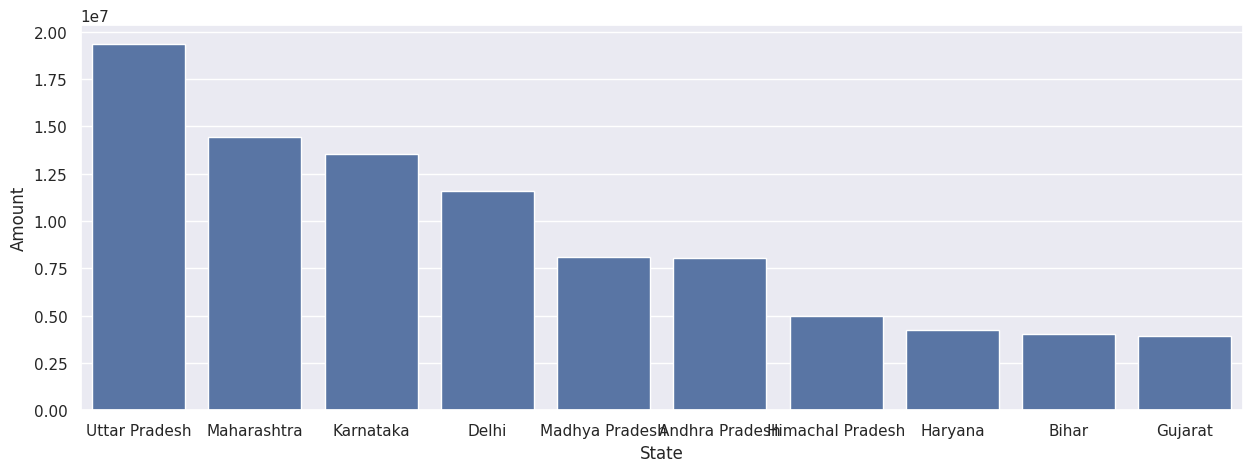

In [ ]:
sns.set(rc={"figure.figsize":(15,5)})
sns.barplot(data=sale_state,x="State",y="Amount")

from above graph we can see that  most of the orders and total sales are from uttar pradesh,Maharashtra,Karnataka respectively

Marital status

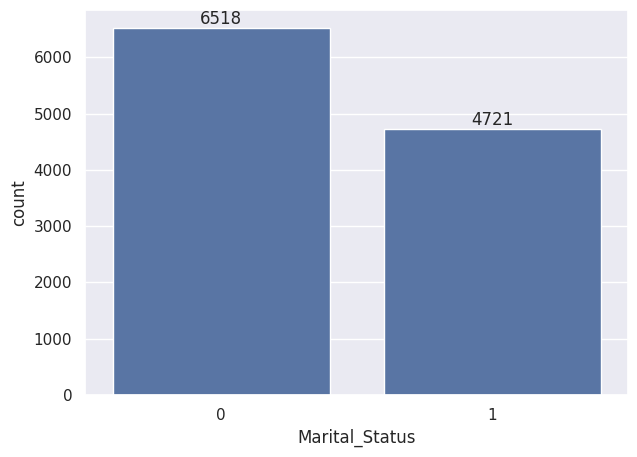

In [ ]:
ax=sns.countplot(data=df,x="Marital_Status")

sns.set(rc={"figure.figsize":(5,5)})
for bars in ax.containers:
  ax.bar_label(bars)

<Axes: xlabel='Marital_Status', ylabel='Amount'>

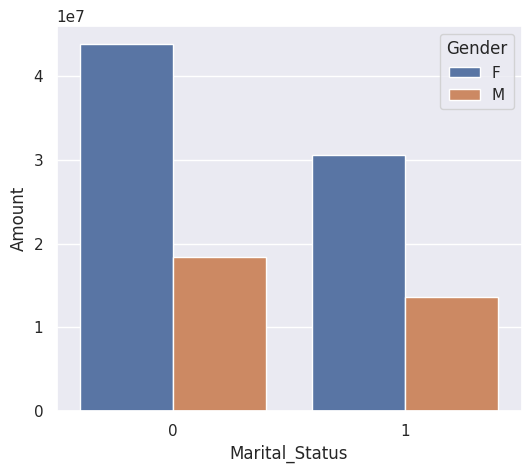

In [ ]:
sales=df.groupby(["Marital_Status","Gender"],as_index=False)["Amount"].sum().sort_values(by="Amount",ascending=False)
sns.set(rc={"figure.figsize":(6,5)})
sns.barplot(data=sales,x="Marital_Status",y="Amount",hue="Gender")

from above graph we can see that most of the buyers are married(women)and they have high purchasing power

Occupation

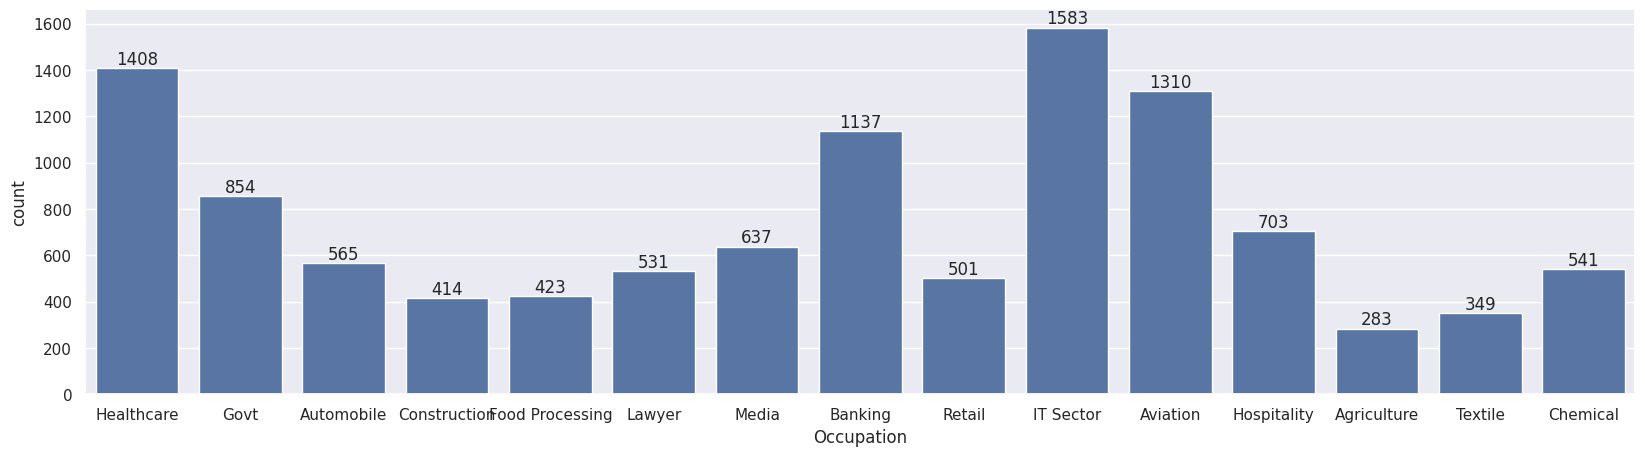

In [ ]:
sns.set(rc={"figure.figsize":(20,5)})
ax=sns.countplot(data=df,x="Occupation")
for bars in ax.containers:
  ax.bar_label(bars)

<Axes: xlabel='Occupation', ylabel='Amount'>

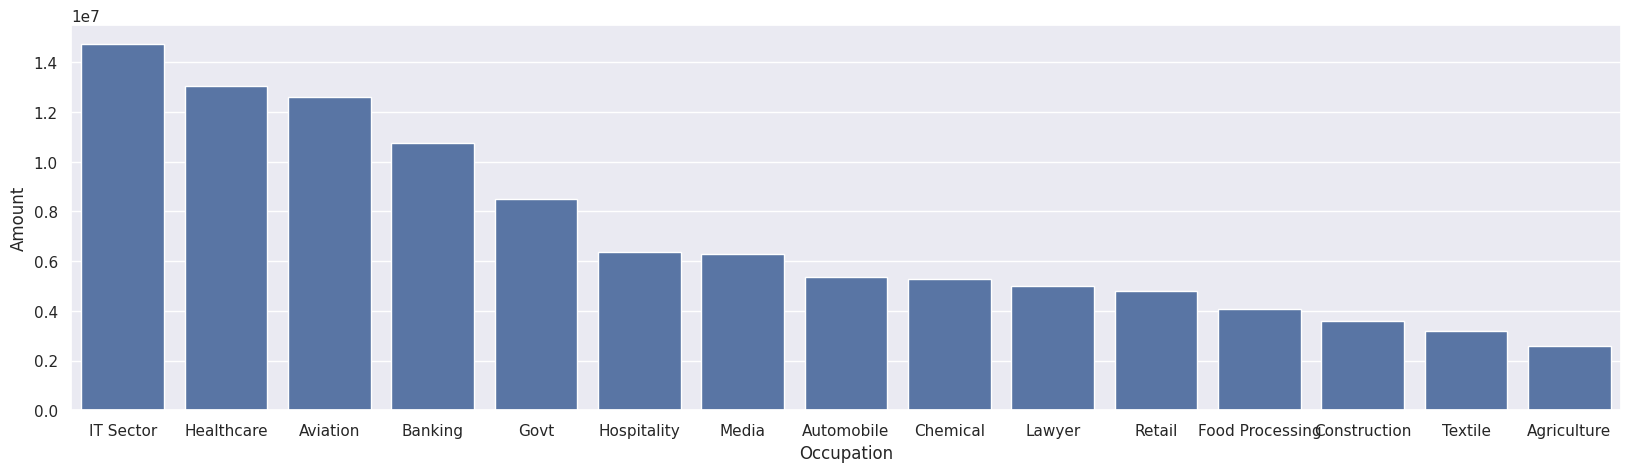

In [ ]:
sales=df.groupby(["Occupation"],as_index=False)["Amount"].sum().sort_values(by="Amount",ascending=False)
sns.set(rc={"figure.figsize":(20,5)})
sns.barplot(data=sales,x="Occupation",y="Amount")

from above graph we can see that most of the buyers are from IT sector,Healthcare,Aviation

Product Category

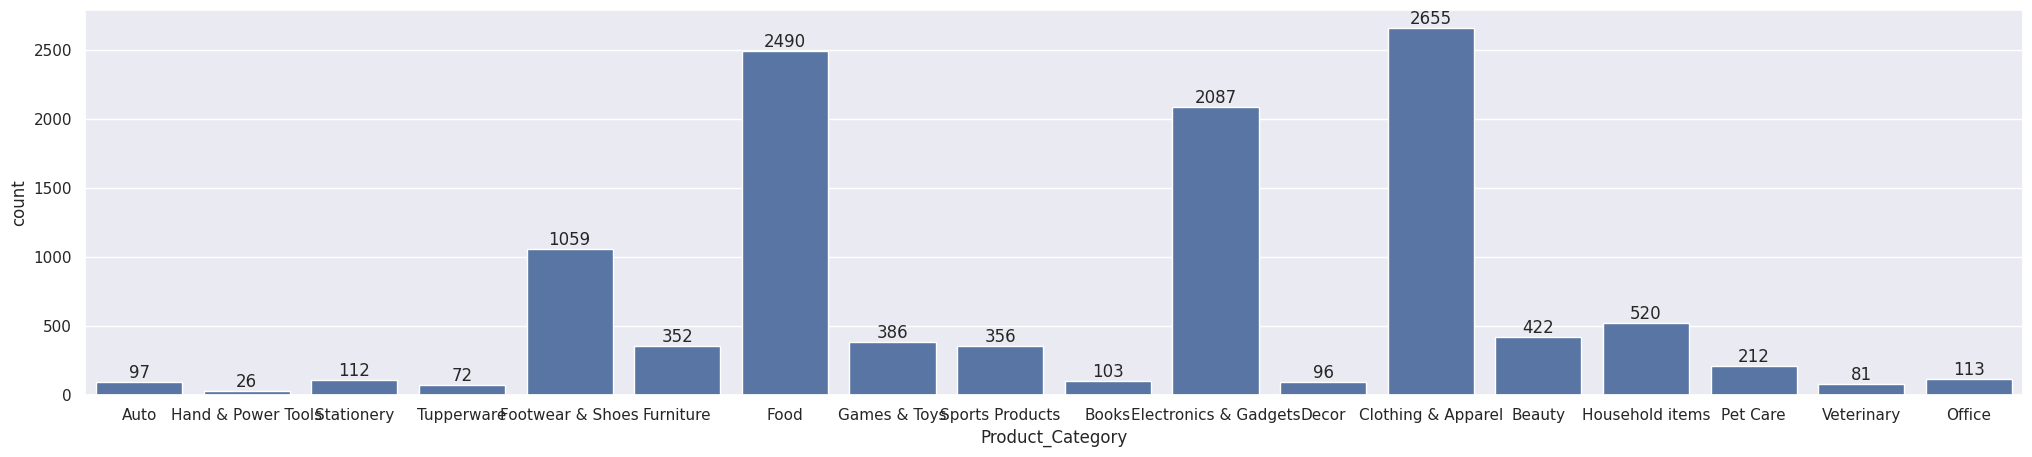

In [ ]:
sns.set(rc={"figure.figsize":(25,5)})
ax=sns.countplot(data=df,x="Product_Category")
for bars in ax.containers:
  ax.bar_label(bars)

<Axes: xlabel='Product_Category', ylabel='Amount'>

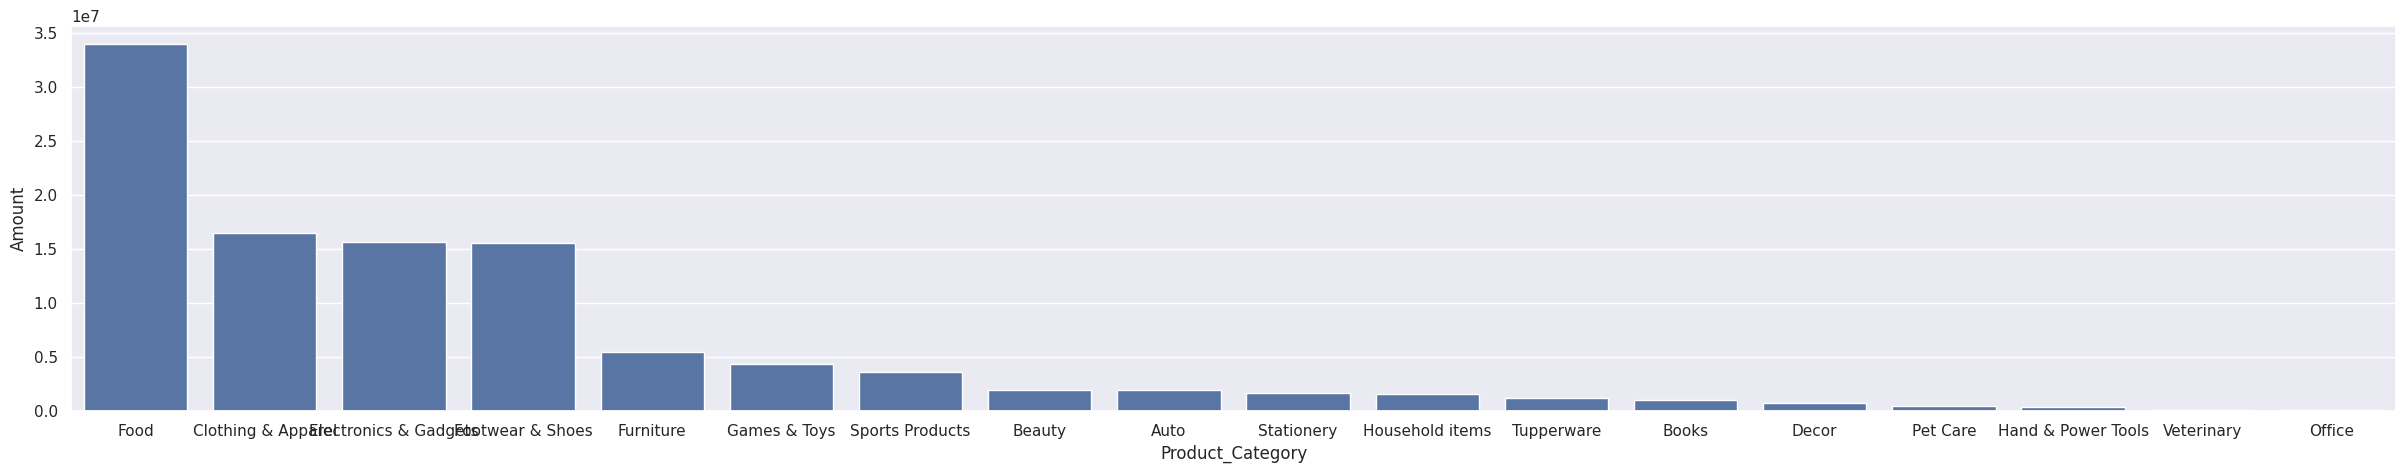

In [ ]:
sales=df.groupby(["Product_Category"],as_index=False)["Amount"].sum().sort_values(by="Amount",ascending=False)
sns.set(rc={"figure.figsize":(30,5)})
sns.barplot(data=sales,x="Product_Category",y="Amount")

from above graph we see that most of the sold product are from food,clothing and electronic

Conclusion

Married women age group 26-35 yrs from UP,Maharashtra,Karnataka working in IT,Healthcare and Aviation are more likely to buy product from food,clothing and electronics category